In [1]:
import os
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
# Define your data directories
image_dir = "G:/down_scaled_level6_test/Tissues"
mask_dir = "G:/down_scaled_level6_test/Masks/binary-mask"

# List all image and mask files
image_files = os.listdir(image_dir)
mask_files = os.listdir(mask_dir)

# Ensure the lists are sorted for matching image-mask pairs
image_files.sort()
mask_files.sort()

# Check if the number of images and masks match
print(len(image_files), len(mask_files))
assert len(image_files) == len(mask_files), "Number of images and masks do not match"

40 40


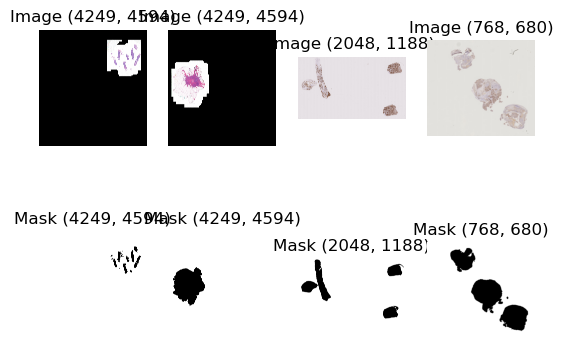

In [3]:
# Function to load image and mask pairs
def load_image_mask_pair(image_path, mask_path):
    image = Image.open(image_path)
    mask = Image.open(mask_path)
    return image, mask

# Display a few image-mask pairs
num_pairs_to_display = 4

for i in range(num_pairs_to_display):
    # Add i to see different images
    image_name = image_files[i + 10]
    mask_name = mask_files[i + 10]

    image_path = os.path.join(image_dir, image_name)
    mask_path = os.path.join(mask_dir, mask_name)

    image, mask = load_image_mask_pair(image_path, mask_path)

    # Display image
    plt.subplot(2, num_pairs_to_display, i + 1)
    plt.imshow(image)
    plt.axis("off")
    plt.title(f"Image {image.size}")

    # Display mask
    plt.subplot(2, num_pairs_to_display, num_pairs_to_display + i + 1)
    plt.imshow(mask, cmap="gray")
    plt.axis("off")
    plt.title(f"Mask {mask.size}")

plt.show()

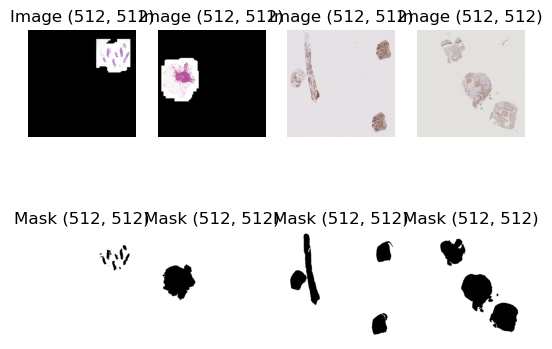

In [4]:
def load_resize_image_mask_pair(image_path, mask_path, target_size):
    image = Image.open(image_path).resize(target_size)
    mask = Image.open(mask_path).resize(target_size)
    return image, mask

# Display a few resized image-mask pairs
num_pairs_to_display = 4
target_size = (512, 512)  # Adjust the size as needed

for i in range(num_pairs_to_display):
    # Add i to see different images
    image_name = image_files[i + 10]
    mask_name = mask_files[i + 10]

    image_path = os.path.join(image_dir, image_name)
    mask_path = os.path.join(mask_dir, mask_name)

    image, mask = load_resize_image_mask_pair(image_path, mask_path, target_size)

    # Display image
    plt.subplot(2, num_pairs_to_display, i + 1)
    plt.imshow(image)
    plt.axis("off")
    plt.title(f"Image {image.size}")

    # Display mask
    plt.subplot(2, num_pairs_to_display, num_pairs_to_display + i + 1)
    plt.imshow(mask, cmap="gray")
    plt.axis("off")
    plt.title(f"Mask {mask.size}")

plt.show()

In [5]:
output_dir = "G:/down_scaled_level6_test_resized"  # New directory for resized images and masks

# Create the output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Save resized image and mask pairs to the output directory
for i in range(len(image_files)):
    image_name = image_files[i]
    mask_name = mask_files[i]

    image_path = os.path.join(image_dir, image_name)
    mask_path = os.path.join(mask_dir, mask_name)

    # Load and resize image and mask pairs
    resized_image, resized_mask = load_resize_image_mask_pair(image_path, mask_path, target_size)

    # Create directory structure in the output directory
    output_image_dir = os.path.join(output_dir, "Tissues", os.path.dirname(image_name))
    output_mask_dir = os.path.join(output_dir, "Masks/binary_mask", os.path.dirname(mask_name))

    os.makedirs(output_image_dir, exist_ok=True)
    os.makedirs(output_mask_dir, exist_ok=True)

    # Save resized images
    output_image_path = os.path.join(output_image_dir, os.path.basename(image_name))
    resized_image.save(output_image_path)

    # Save resized masks
    output_mask_path = os.path.join(output_mask_dir, os.path.basename(mask_name))
    resized_mask.save(output_mask_path)

print("Resized images and masks saved to:", output_dir)

Resized images and masks saved to: G:/down_scaled_level6_test_resized
